Mamdani Fuzzy Inference System

In [ ]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np

In [ ]:
# New Antecedent/Consequent objects hold universe variables and membership
# functions
#Defining the Input Variables (Fuzzification)
ambient = ctrl.Antecedent(np.arange(0, 800, 1), 'ambient') #Lux
power = ctrl.Consequent(np.arange(0, 21, 1), 'power',  defuzzify_method='centroid')#watts


In [ ]:
ambient.automf(names=['dark','medium','bright'])


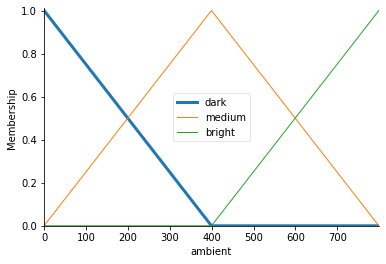

In [ ]:
ambient['dark'].view()

In [ ]:
power['low'] = fuzz.trimf(power.universe, [0, 5, 10])
power['medium'] = fuzz.trimf(power.universe, [5, 10, 13])
power['high'] = fuzz.trimf(power.universe, [10, 12, 20])

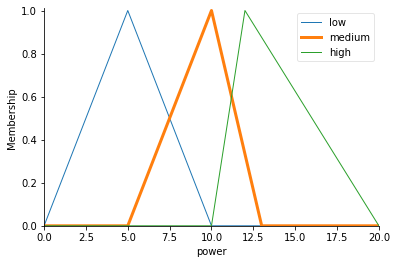

In [ ]:
power['medium'].view()

In [ ]:
#Rules
rule1 = ctrl.Rule(ambient['dark'] , power['high'])
rule2 = ctrl.Rule(ambient['medium'] , power['medium'])
rule3 = ctrl.Rule(ambient['bright'] , power['low'])


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc267fae210>)

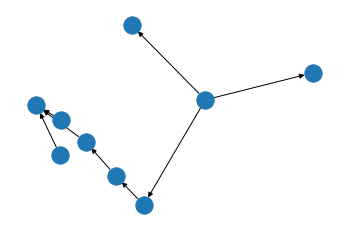

In [ ]:
rule1.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc267d02d90>)

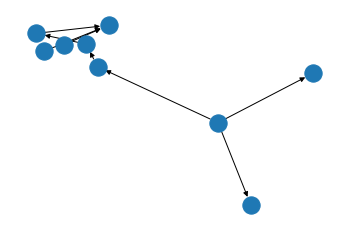

In [ ]:
rule2.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc267f538d0>)

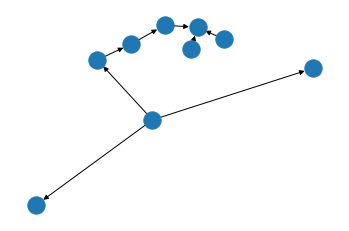

In [ ]:
rule3.view()

12.492076117007334


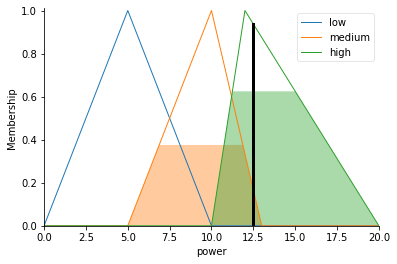

In [ ]:
illumination_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
illumination = ctrl.ControlSystemSimulation(illumination_ctrl)
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
illumination.input['ambient'] = 150
# Crunch the numbers
illumination.compute()
print(illumination.output['power'])
power.view(sim=illumination)
